In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D,Flatten,Activation
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [2]:
train = ImageDataGenerator(rescale = 1/255)
valid = ImageDataGenerator(rescale = 1/255)

In [3]:
train_dataset = train.flow_from_directory("basedata/train",
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')

valid_dataset = valid.flow_from_directory("basedata/valid",
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')


Found 2657 images belonging to 4 classes.
Found 334 images belonging to 4 classes.


In [4]:
print(train_dataset.class_indices)
print(valid_dataset.class_indices)


{'Default': 0, 'Palm': 1, 'ThumbsDown': 2, 'ThumbsUp': 3}
{'Default': 0, 'Palm': 1, 'ThumbsDown': 2, 'ThumbsUp': 3}


In [5]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.2))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(4, activation = "softmax"))
model.add(Flatten())

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
History = model.fit(train_dataset,steps_per_epoch=10,epochs=20,validation_data=(valid_dataset,))
#,steps_per_epoch=10

Epoch 1/20


c:\users\neil2\pycharmprojects\computer vision\venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


10/10 [==============================] - 4s 350ms/step - loss: 1.7468 - accuracy: 0.3000 - val_loss: 1.3935 - val_accuracy: 0.1826
Epoch 2/20
10/10 [==============================] - 3s 297ms/step - loss: 1.3752 - accuracy: 0.3333 - val_loss: 1.3912 - val_accuracy: 0.2275
Epoch 3/20
10/10 [==============================] - 3s 289ms/step - loss: 1.3124 - accuracy: 0.4000 - val_loss: 1.4594 - val_accuracy: 0.3144
Epoch 4/20
10/10 [==============================] - 4s 394ms/step - loss: 1.5628 - accuracy: 0.4000 - val_loss: 1.3960 - val_accuracy: 0.2605
Epoch 5/20
10/10 [==============================] - 3s 338ms/step - loss: 1.3039 - accuracy: 0.5333 - val_loss: 1.3643 - val_accuracy: 0.5838
Epoch 6/20
10/10 [==============================] - 4s 400ms/step - loss: 1.2736 - accuracy: 0.6667 - val_loss: 1.3420 - val_accuracy: 0.3383
Epoch 7/20
10/10 [==============================] - 4s 417ms/step - loss: 1.1504 - accuracy: 0.4667 - val_loss: 1.3969 - val_accuracy: 0.4940
Epoch 8/20
10/10 

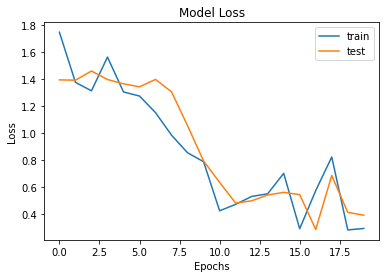

In [6]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

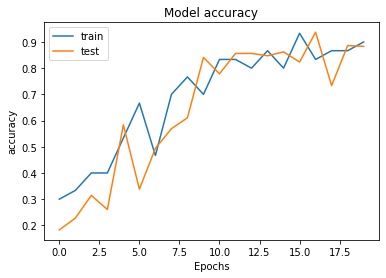

In [7]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 32)        0

In [9]:
loss,acc=model.evaluate(valid_dataset)
print('accuracy: {:5.2f}%'.format(100*acc))

112/112 [==============================] - 4s 31ms/step - loss: 0.3899 - accuracy: 0.8832
accuracy: 88.32%


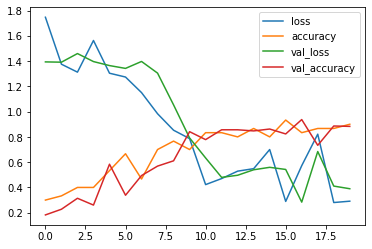

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(History.history).plot()
plt.show()

In [15]:
from sklearn.datasets import make_multilabel_classification
X,y=make_multilabel_classification(n_samples=2657,n_features=4,n_classes=2,n_labels=3,random_state=1)
X

array([[ 9., 12.,  6., 12.],
       [ 5.,  2., 12., 22.],
       [15.,  5., 12., 11.],
       ...,
       [10.,  2., 14., 19.],
       [ 6.,  5.,  8., 24.],
       [ 0., 14., 10., 28.]])

In [19]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.10, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

NameError: name 'input_data' is not defined

In [11]:
model.save('my_model.h5')

In [12]:
dir_path = "basedata/test"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x= image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    
    val = model.predict(images)
    print(type(val[0][0]))
    print(val)
    if val[0][1] == True:
        print('Palm')
    elif val[0][2] == True:
        print('ThumbDown')
    elif val[0][3] == True:
        print('Thumbup')
# model.predict("basedata/test/WIN_20220714_21_35_15_Pro (2).jpg")

PermissionError: [Errno 13] Permission denied: 'basedata/test//.ipynb_checkpoints'